In [1]:
#From SAV to LOVE

# HW 1

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])
X.shape

(2, 10)

In [14]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err
W = np.linalg.inv(X @ X.T) @ X @ y
W

array([47.23214286,  3.91071429])

In [15]:
calc_mse(y, W.dot(X))

45.93749999999999

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [17]:
calc_mae(y, W.dot(X))

6.182142857142858

### Задача №__1.__ Подберите скорость обучения (alpha) и количество итераций:

In [18]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1., 0.5])
W, alpha

(array([1. , 0.5]), 0.01)

In [19]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434


__Решение__

In [38]:
# Построим функцию нормы сходимости для двух массивов W1 и W2
def f_norm(w1,w2):
    return(np.linalg.norm(w1 - w2))

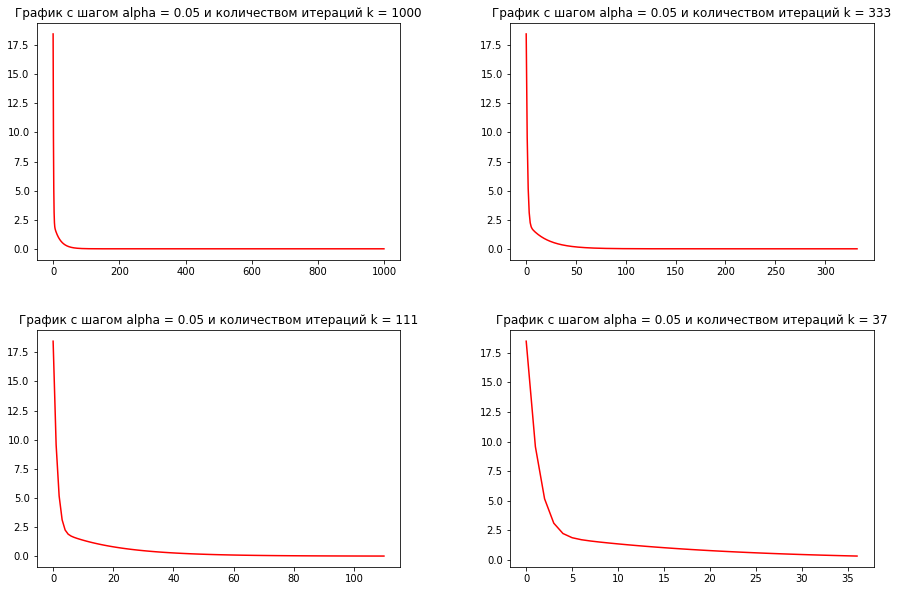

In [72]:
# Построим графики при фиксированном шаге (0.05) и будем уменьшать количество итераций чтобы отследить сходимость

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15, 10)
fig.subplots_adjust(wspace=0.3, hspace = 0.3)

comb = [(0,0),(0,1),(1,0),(1,1)]
alpha = 0.05
k = 1000
W = np.array([1., 0.1])

for j in range(4):
    l_rate = []
    W1 = W.copy()
    for i in range(k):
        y_pred = np.dot(W1, X)
        Wp = W1.copy()
        for ii in range(W1.shape[0]):
            W1[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        l_rate.append(f_norm(W1,Wp))
    ax[comb[j]].plot(range(k),l_rate, label=" alpha = {alpha} и  k = {k} ", color='r')
    ax[comb[j]].set_title(f'График с шагом alpha = {alpha} и количеством итераций k = {k}')
    k = k//3
    

Построим зависимость количества итераций от размера шага при фиксированной точности нормы сходимости

In [48]:
steps = np.linspace(0.01,0.1,20)
steps

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [74]:
k = 2000
W = np.array([1., 0.1])
N =[]
ss = []
eps = 1e-7
for st in steps:
    W1 = W.copy()
    for i in range(k):
        y_pred = np.dot(W1, X)
        Wp = W1.copy()
        for ii in range(W1.shape[0]):
            W1[ii] -= st * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        if wnorm(W1,Wp) < eps:
            N.append(i)
            ss.append(st)
            break
for j in range(len(ss)):
    print(f'alpha = {round(ss[j],4)},\t k = {N[j]}')

alpha = 0.06,	 k = 267
alpha = 0.0601,	 k = 266
alpha = 0.0602,	 k = 266
alpha = 0.0603,	 k = 265
alpha = 0.0604,	 k = 265
alpha = 0.0605,	 k = 265
alpha = 0.0606,	 k = 264
alpha = 0.0607,	 k = 264
alpha = 0.0608,	 k = 263
alpha = 0.0609,	 k = 263
alpha = 0.061,	 k = 262
alpha = 0.0611,	 k = 262
alpha = 0.0612,	 k = 262
alpha = 0.0613,	 k = 261
alpha = 0.0614,	 k = 261
alpha = 0.0615,	 k = 260
alpha = 0.0616,	 k = 260
alpha = 0.0617,	 k = 260
alpha = 0.0618,	 k = 259
alpha = 0.0619,	 k = 259
alpha = 0.062,	 k = 258
alpha = 0.0621,	 k = 258
alpha = 0.0622,	 k = 257
alpha = 0.0623,	 k = 257
alpha = 0.0624,	 k = 257
alpha = 0.0625,	 k = 256
alpha = 0.0626,	 k = 256
alpha = 0.0627,	 k = 255
alpha = 0.0628,	 k = 255
alpha = 0.0629,	 k = 255
alpha = 0.063,	 k = 254
alpha = 0.0631,	 k = 254
alpha = 0.0632,	 k = 254
alpha = 0.0633,	 k = 253
alpha = 0.0634,	 k = 253
alpha = 0.0635,	 k = 252
alpha = 0.0636,	 k = 252
alpha = 0.0637,	 k = 252
alpha = 0.0638,	 k = 253
alpha = 0.0639,	 k = 258
alpha

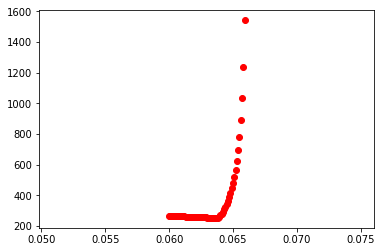

In [75]:
plt.scatter(ss,N, color='r')

В нашем случае получается оптимальным шаг = 0.0635,0.0636,0.0637 . В таком случае с точностью до 1e-7 можем получить решение за 252 итерации

-----

### Задача №__2*__. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [20]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1., 0.5])
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))

    if i % 100 == 0:
        print(i, W, err)

0 [5.502 5.002] 3173.15
100 [11.82211538 11.32211538] 737.0918269230771
200 [11.82211538 11.32211538] 737.0918269230771
300 [11.82211538 11.32211538] 737.0918269230771
400 [11.82211538 11.32211538] 737.0918269230771
500 [11.82211538 11.32211538] 737.0918269230771
600 [11.82211538 11.32211538] 737.0918269230771
700 [11.82211538 11.32211538] 737.0918269230771
800 [11.82211538 11.32211538] 737.0918269230771
900 [11.82211538 11.32211538] 737.0918269230771


__Решение__   

In [73]:
# определим вектор W как  массив, что позволит  использовать транспонирование 
W = np.array([[1., 0.1]])
# y_pred - y необходимо траспонировать длля  умножения на него матрици X, далее полученный результат необходимо еще раз транспонировать что приведет масив W к исходной форме
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * X.dot((y_pred - y).T).T))   
    if i % 100 == 0:
        print(i, W, err)

0 [[ 6.614 17.684]] 3311.486
100 [[47.03175489  3.94771746]] 45.96152093988969
200 [[47.23118078  3.91089194]] 45.937500553686974
300 [[47.23213824  3.91071514]] 45.93750000001276
400 [[47.23214283  3.91071429]] 45.93749999999999
500 [[47.23214286  3.91071429]] 45.93750000000001
600 [[47.23214286  3.91071429]] 45.937500000000014
700 [[47.23214286  3.91071429]] 45.9375
800 [[47.23214286  3.91071429]] 45.9375
900 [[47.23214286  3.91071429]] 45.9375
